In [133]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [134]:
#Fetching Dataset
df = pd.read_csv('EV_Charging_Station.csv')
df.head()

no region                                            address  \
0   1   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
1   2   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
2   3   NDMC  Outside RWA Park, Jor Bagh Market, Jor Bagh Co...   
3   4   NDMC  Opposite Dory Pharmacy, Khanna Market, Aliganj...   
4   5   NDMC  Opposite Goel Opticals, Khanna Market, Aliganj...   

                                          aux addres   latitude  longitude  \
0  Electric Vehicle Charger, Prithviraj Market, R...  28.600725  77.226252   
1  Electric Vehicle Charger, Prithviraj Market, R...  28.600725  77.226252   
2  Electric Vehicle Charger, Outside RWA Park, Jo...  28.588303  77.217697   
3  Electric Vehicle Charger, Opposite Dory Pharma...  28.582654  77.220087   
4  Electric Vehicle Charger, Opposite Goel Optica...  28.584485  77.220316   

     type  power       service  
0  DC-001  15 kW  Self Service  
1  DC-001  15 kW  Self Service  
2  DC-001  15 kW  Self Service  
3  DC-001  15 kW  Self Service  
4  DC-001  15 kW  Self Service

In [135]:
# Check for missing values
df.isnull().sum()

# Drop or fill missing values as needed
df.dropna(subset=['latitude', 'longitude'], inplace=True)
df.dropna(inplace = True)
df.dropna(axis = 1, inplace = True)
df.fillna(df.median(), inplace = True)


C:\Users\dassu\AppData\Local\Temp\ipykernel_27020\1044370559.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace = True)


In [136]:
#EXPLORATORY DATA ANALYSIS(EDA)
#Analysing dataset
print('DF Shape:' , df.shape)

DF Shape: (202, 9)


In [137]:
#checking info (columns, datatypes, nulls) of datasets
print('<< DATASET------------------------------------------')
print(df.info())



<< DATASET------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB
None


In [138]:
#statistical summary of the dataset
d = df.describe()
display('<<< DATASET >>>', d)

'<<< DATASET >>>'

no    latitude   longitude
count  202.000000  202.000000  202.000000
mean   101.500000   25.960987   78.418002
std     58.456537    5.616108    3.097664
min      1.000000    8.481051   76.277781
25%     51.250000   28.535516   77.212996
50%    101.500000   28.580286   77.226252
75%    151.750000   28.617783   77.375216
max    202.000000   28.642892   88.509064

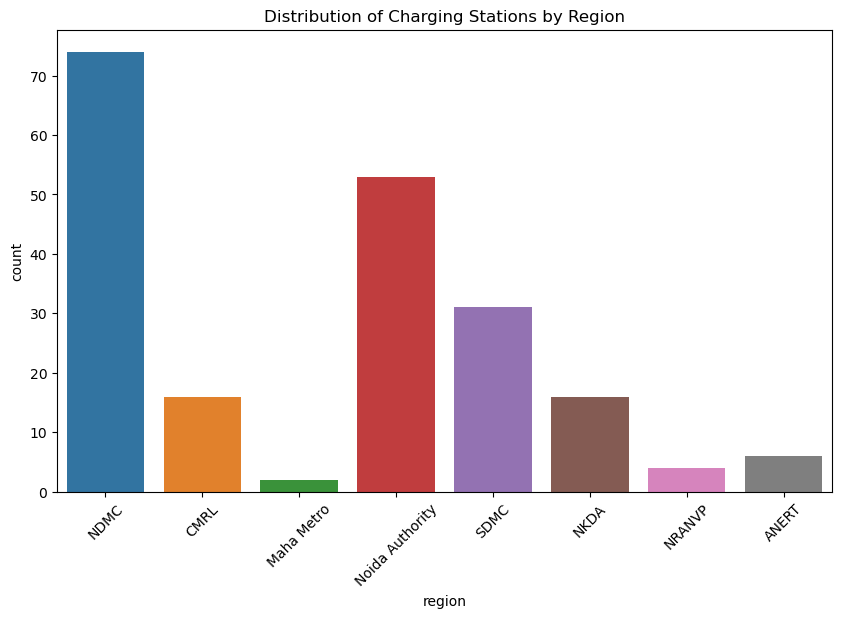

In [139]:
# Distribution of charging stations by region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region')
plt.title('Distribution of Charging Stations by Region')
plt.xticks(rotation=45)
plt.show()

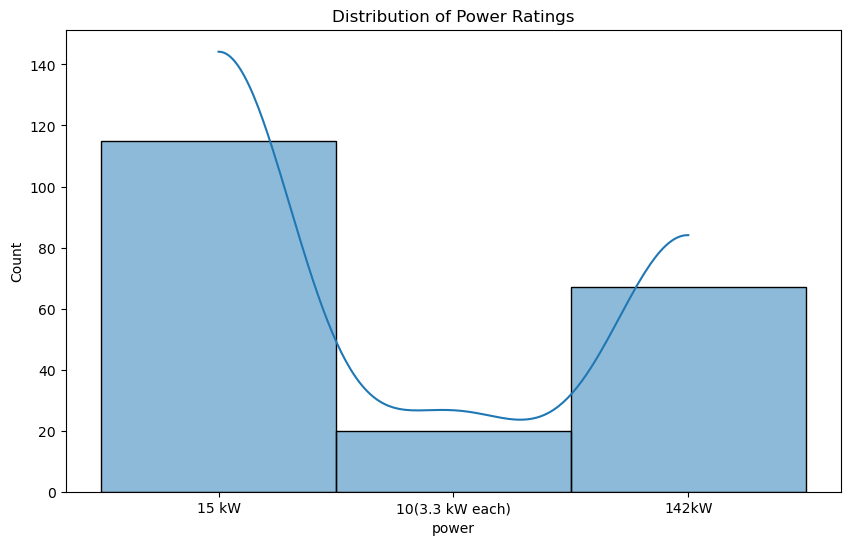

In [140]:
# Distribution of power ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['power'], kde=True)
plt.title('Distribution of Power Ratings')
plt.show()

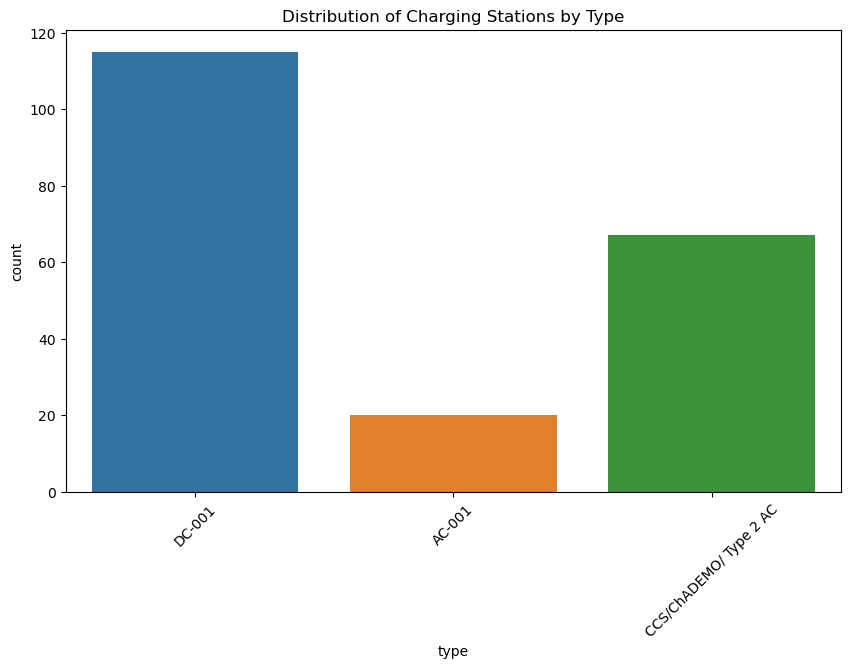

In [141]:
# Distribution of charging stations by type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Charging Stations by Type')
plt.xticks(rotation=45)
plt.show()

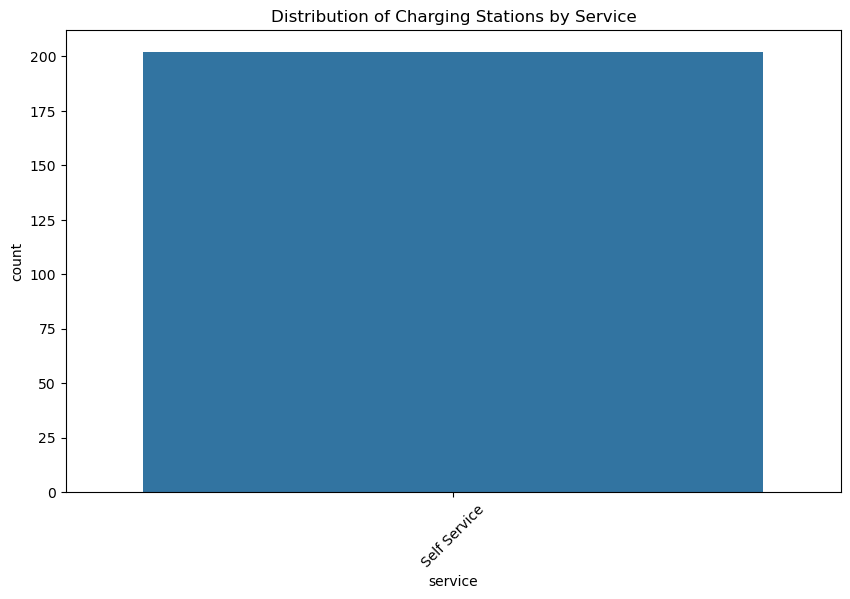

In [142]:
# Distribution of charging stations by service
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='service')
plt.title('Distribution of Charging Stations by Service')
plt.xticks(rotation=45)
plt.show()

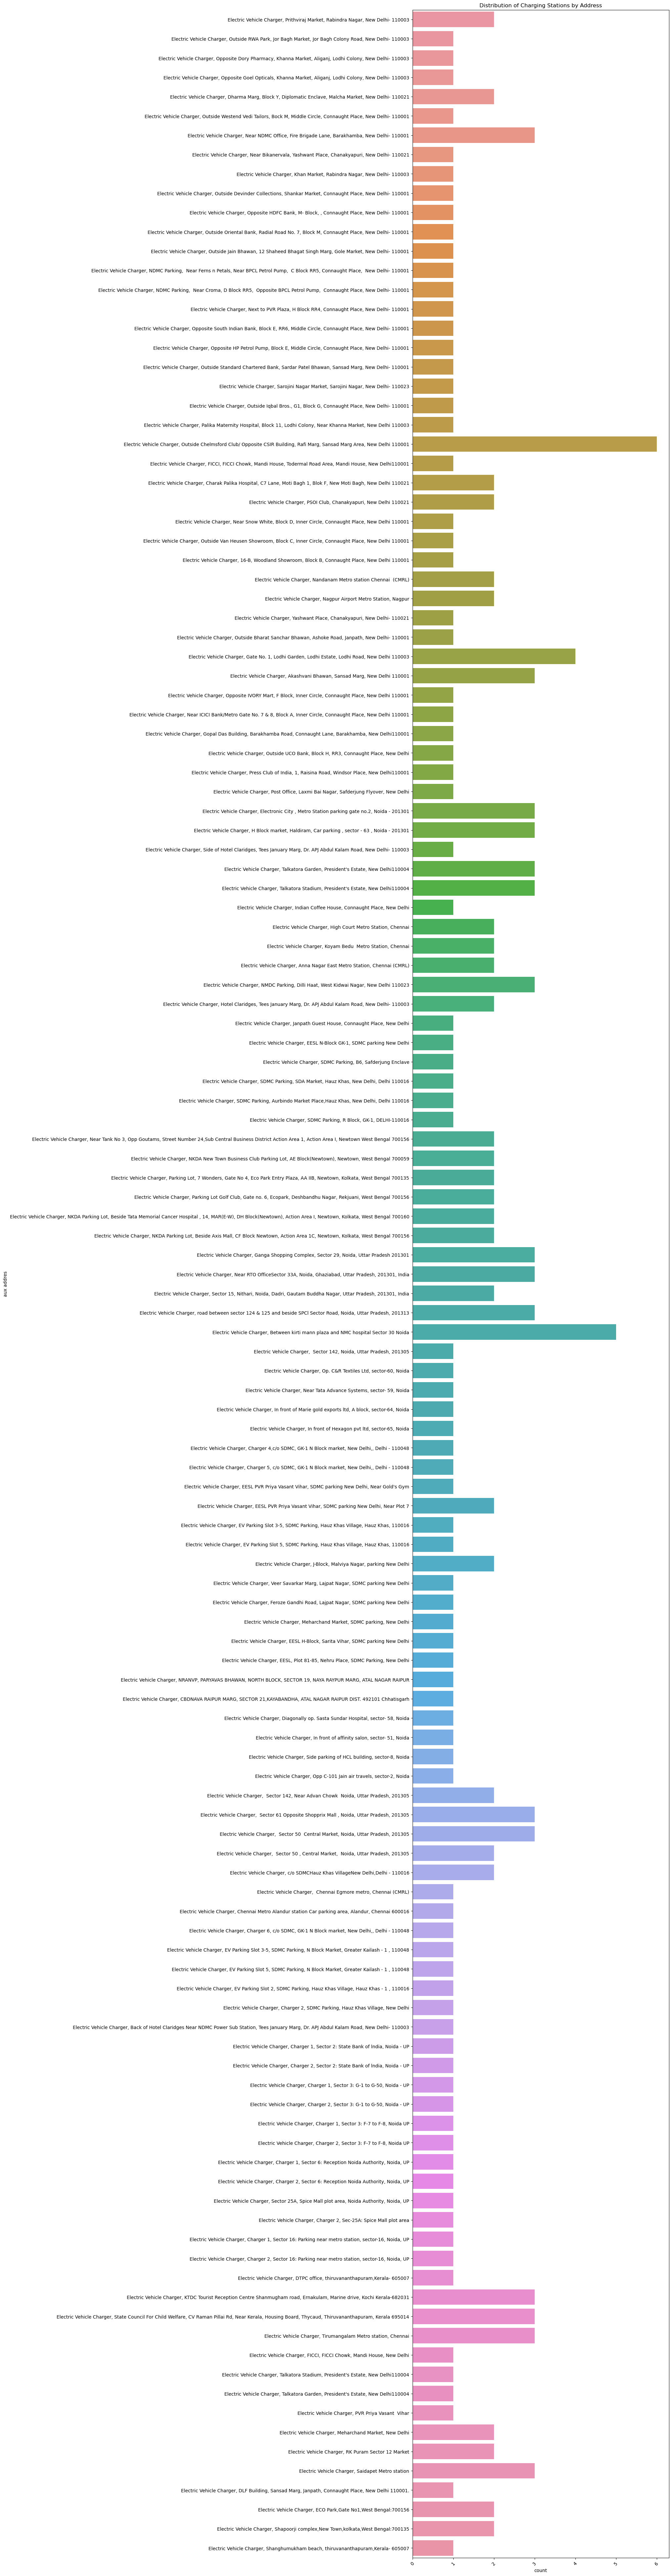

In [143]:
# Distribution of charging stations by address
plt.figure(figsize=(10, 100))
sns.countplot(data=df, y='aux addres')
plt.title('Distribution of Charging Stations by Address')
plt.xticks(rotation=45)
plt.show()

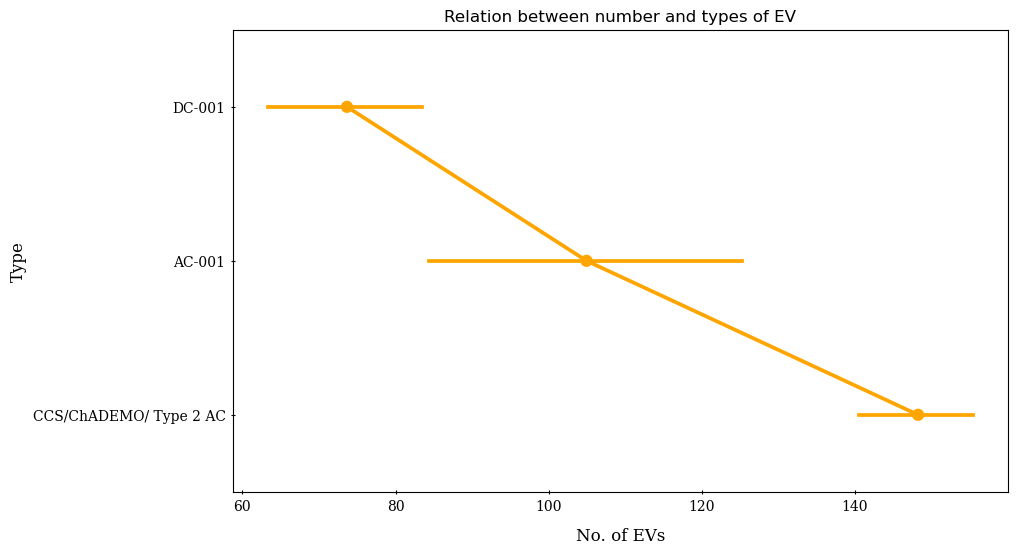

In [145]:
# Relationship between number of EV and power consumption
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='no', y='type', color = 'orange')
plt.xlabel('No. of EVs', family='serif', size=12, labelpad=10)
plt.ylabel('Type', family='serif', size=12)
plt.title('Relation between number and types of EV')
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.show()

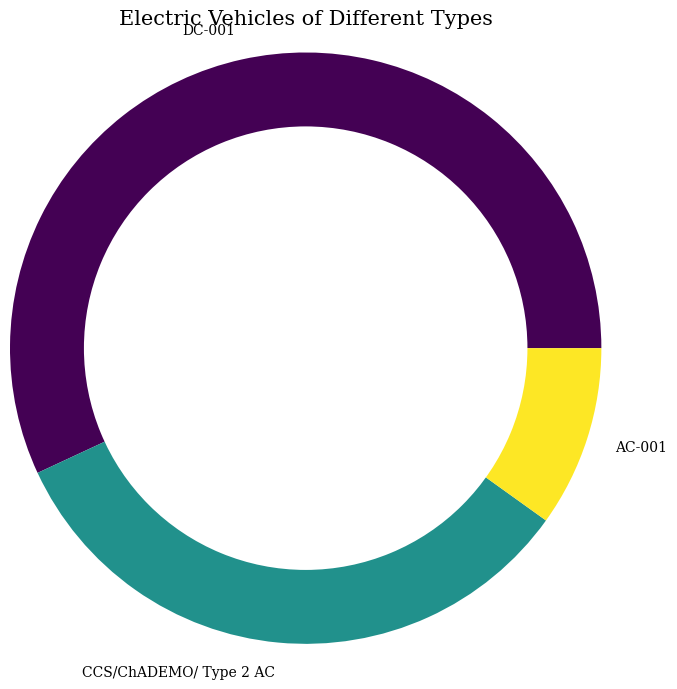

In [146]:
# different types EVs visualization from dataset
x = df['type'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.5, colors='white')
plt.title(label='Electric Vehicles of Different Types', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

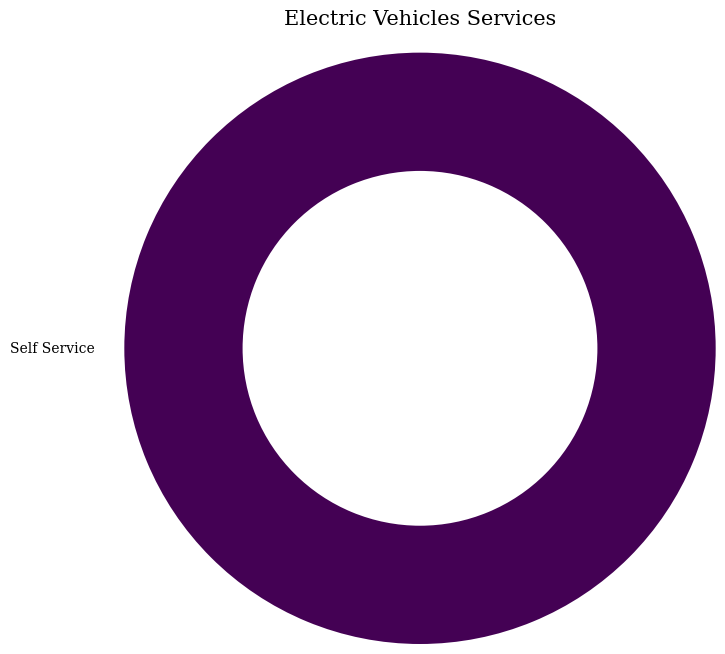

In [147]:
# analysis of type of charging service of EVs from dataset
x = df['service'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles Services', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

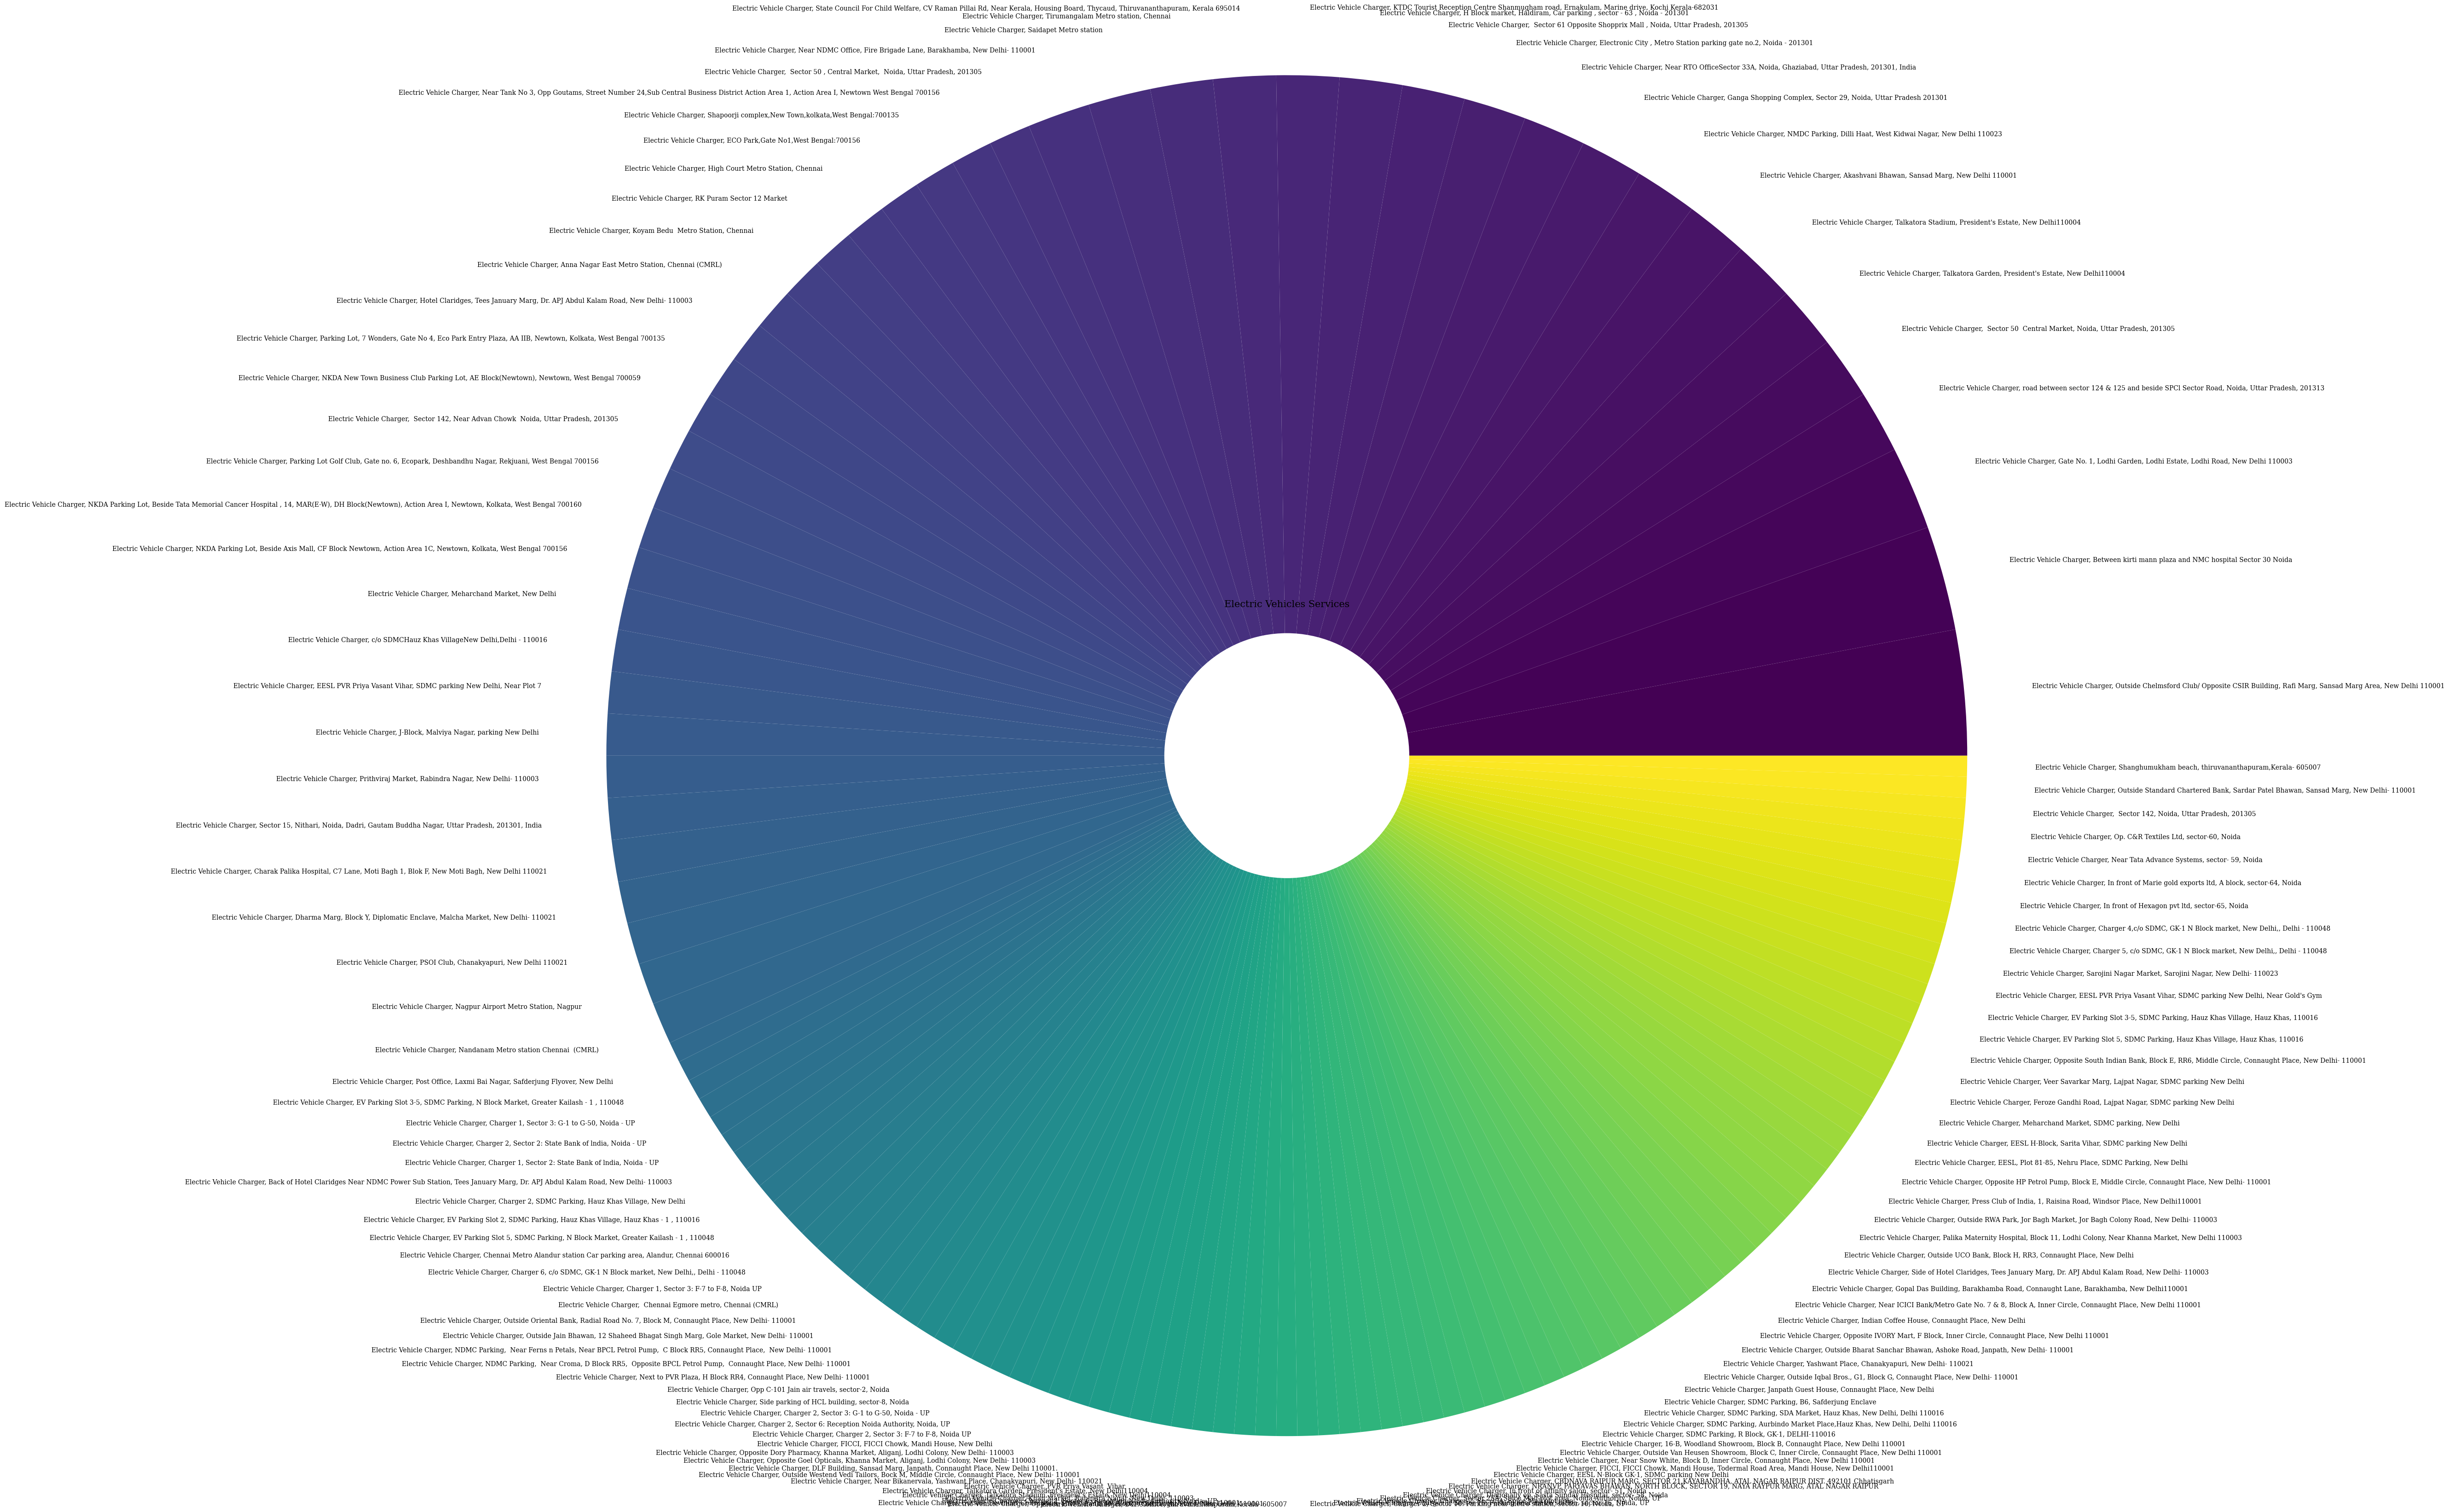

In [148]:
# analysis of charging stations of EVs from dataset
x = df['aux addres'].value_counts().plot.pie(radius=10, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=5)
plt.pie(x=[1], radius=1.8, colors='white')
plt.title(label='Electric Vehicles Services', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

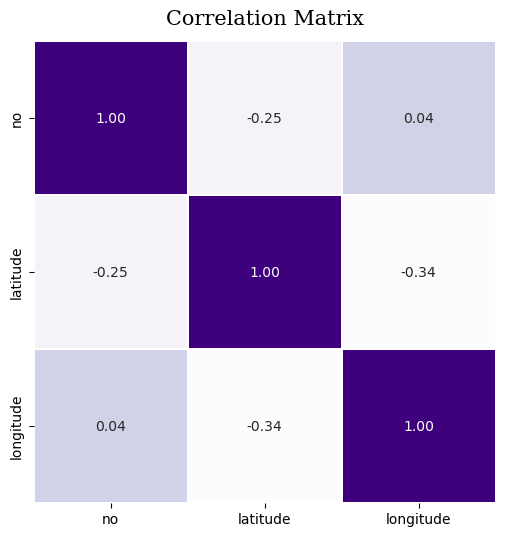

In [149]:
# plotting the correlation matrix from dataset
plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12)

In [150]:
# Selecting features for clustering
# Encoding categorical features
# Encoding categorical features
df_encoded = pd.get_dummies(df, columns=['type', 'service'], drop_first=True)

# Selecting relevant features
features = ['latitude', 'longitude', 'power'] + [col for col in df_encoded.columns if col.startswith('type_') or col.startswith('service_')]
X = df_encoded[features]


In [151]:
#Scaling Data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


ValueError: could not convert string to float: '15 kW'

In [ ]:
#Principal Component Analysis(PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca.head()